In [9]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import *
import numpy as np
from itertools import product

In [10]:
import sympy
from qiskit.circuit import ParameterExpression

Start by building brute force search for CNOT. This is a bit silly because for a known target, you can just calculate these parameter values directly. Alternatively, you can just permute your available gates around these positions like down in cnot_axbxc.ipynb

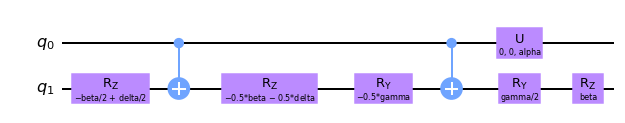

In [11]:
alpha = Parameter('alpha')
beta = Parameter('beta')
delta = Parameter('delta')
gamma = Parameter('gamma')

c_sub = QuantumCircuit(1, name='C')
c_sub.rz((delta-beta)/2, 0)
c_gate = c_sub.to_gate()

b_sub = QuantumCircuit(1, name="B")
b_sub.rz(-(delta+beta)/2, 0)
b_sub.ry(-gamma/2, 0)
b_gate = b_sub.to_gate()

a_sub = QuantumCircuit(1,name="A")
a_sub.ry(gamma/2, 0)
a_sub.rz(beta, 0)
a_gate = a_sub.to_gate()

qc = QuantumCircuit(2)
qc.append(c_gate,[1])
qc.append(CXGate(), [0,1])
qc.append(b_gate,[1])
qc.append(CXGate(),[0,1])
qc.append(a_gate,[1])
qc.append(PhaseGate(alpha), [0])
qc.decompose().draw(output='mpl')

In [12]:
alpha_range = beta_range = delta_range = gamma_range = np.arange(0, 2 * np.pi, np.pi/4)

circuits = [qc.bind_parameters({alpha: alpha_val, beta:beta_val, delta:delta_val, gamma:gamma_val})
            for alpha_val, beta_val, delta_val, gamma_val in product(alpha_range, beta_range, delta_range, gamma_range)]

In [13]:
target = CXGate()
for circuit in circuits:
    if Operator(circuit).equiv(target):
        print(circuit.decompose().draw())

                                                  ┌────────────┐           
q_0: ─────────────■────────────────────────────■──┤ U(0,0,π/2) ├───────────
     ┌─────────┐┌─┴─┐┌──────────┐┌──────────┐┌─┴─┐└┬─────────┬─┘┌─────────┐
q_1: ┤ Rz(π/2) ├┤ X ├┤ Rz(-π/2) ├┤ Ry(-π/2) ├┤ X ├─┤ Ry(π/2) ├──┤ Rz(0.0) ├
     └─────────┘└───┘└──────────┘└──────────┘└───┘ └─────────┘  └─────────┘
                                                   ┌────────────┐           
q_0: ─────────────■─────────────────────────────■──┤ U(0,0,π/2) ├───────────
     ┌─────────┐┌─┴─┐┌───────────┐┌──────────┐┌─┴─┐└┬─────────┬─┘┌─────────┐
q_1: ┤ Rz(π/2) ├┤ X ├┤ Rz(-3π/4) ├┤ Ry(-π/2) ├┤ X ├─┤ Ry(π/2) ├──┤ Rz(π/4) ├
     └─────────┘└───┘└───────────┘└──────────┘└───┘ └─────────┘  └─────────┘
                                                ┌────────────┐           
q_0: ─────────────■──────────────────────────■──┤ U(0,0,π/2) ├───────────
     ┌─────────┐┌─┴─┐┌────────┐┌──────────┐┌─┴─┐└┬─────────┬─┘┌─────────┐
q_1: ┤ Rz(π/2

In [14]:
import qiskit.extensions as qe
class rootswap_gate(qe.UnitaryGate):
    def __init__(self):
        super().__init__(
            data=np.array(
                [
                    [1, 0, 0, 0],
                    [0, 0.5 * (1 + 1j), 0.5 * (1 - 1j), 0],
                    [0, 0.5 * (1 - 1j), 0.5 * (1 + 1j), 0],
                    [0, 0, 0, 1],
                ]
            ),
            label=r"$\sqrt{SWAP}$",
        )

In [15]:
class rootiswap_gate(qe.UnitaryGate):
    def __init__(self):
        super().__init__(
            data=np.array(
                [[1,0,0,0],[0,1/np.sqrt(2),1j/np.sqrt(2),0],[0,1j/np.sqrt(2),1/np.sqrt(2),0],[0,0,0,1]]
            ),
            label=r"$i\sqrt{SWAP}$"
        )

Start with ASWAPBSWAPC = U

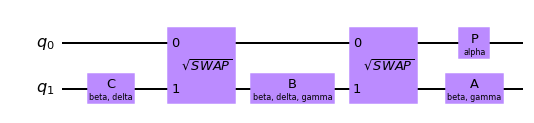

In [16]:
alpha = Parameter('alpha')
beta = Parameter('beta')
delta = Parameter('delta')
gamma = Parameter('gamma')

c_sub = QuantumCircuit(1, name='C')
c_sub.rz((delta-beta)/2, 0)
c_gate = c_sub.to_gate()

b_sub = QuantumCircuit(1, name="B")
b_sub.rz(-(delta+beta)/2, 0)
b_sub.ry(-gamma/2, 0)
b_gate = b_sub.to_gate()

a_sub = QuantumCircuit(1,name="A")
a_sub.ry(gamma/2, 0)
a_sub.rz(beta, 0)
a_gate = a_sub.to_gate()

qc = QuantumCircuit(2)
qc.append(c_gate,[1])
qc.append(rootswap_gate(), [0,1])
qc.append(b_gate,[1])
qc.append(rootswap_gate(),[0,1])
qc.append(a_gate,[1])
qc.append(PhaseGate(alpha), [0])
qc.draw(output='mpl')

In [17]:
from itertools import product

alpha_range = beta_range = delta_range = gamma_range = np.arange(0, 2 * np.pi, np.pi/4)

circuits = [qc.bind_parameters({alpha: alpha_val, beta:beta_val, delta:delta_val, gamma:gamma_val})
            for alpha_val, beta_val, delta_val, gamma_val in product(alpha_range, beta_range, delta_range, gamma_range)]

In [18]:
target = CXGate()
for circuit in circuits:
    if Operator(circuit).equiv(Operator(target)):
        print(circuit.decompose().draw())

No results, not suprising. We need to adapt the building block - but this is hard to do without getting a better closed form first. Ideally, we can just solve for these values like we would for the normal CX case, but can we try brute forcing them. Problem is that even with a small search space, there are just too many free variables!

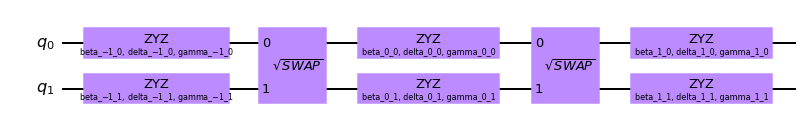

In [19]:
def zy_unitary(m_label, u_label):
    #use U = Z-Y decomposition to reduce U into a set of 4 parameters

    alpha = Parameter(f'alpha_{m_label}_{u_label}')
    beta = Parameter(f'beta_{m_label}_{u_label}')
    delta = Parameter(f'delta_{m_label}_{u_label}')
    gamma = Parameter(f'gamma_{m_label}_{u_label}')

    module_sub = QuantumCircuit(1, name="ZYZ")
    module_sub.rz(beta, 0)
    module_sub.ry(delta, 0)
    module_sub.rz(gamma, 0)
    module_gate = module_sub.to_gate()

    return module_gate

def zx_unitary(m_label, u_label):
    #use U = Z-X decomposition to reduce U into a set of 4 parameters

    alpha = Parameter(f'alpha_{m_label}_{u_label}')
    beta = Parameter(f'beta_{m_label}_{u_label}')
    delta = Parameter(f'delta_{m_label}_{u_label}')
    gamma = Parameter(f'gamma_{m_label}_{u_label}')

    module_sub = QuantumCircuit(1, name="ZXZ")
    module_sub.rz(beta, 0)
    module_sub.rx(delta, 0)
    module_sub.rz(gamma, 0)
    module_gate = module_sub.to_gate()

    return module_gate

n_modules = 2
qc = QuantumCircuit(2)
qc.append(zy_unitary(-1,0), [0])
qc.append(zy_unitary(-1,1), [1])
for i in range(n_modules):
    qc.append(rootswap_gate(), [0,1])
    qc.append(zy_unitary(i,0), [0])
    qc.append(zy_unitary(i,1),[1])
qc.draw(output='mpl')

A complete sweep of parameters is too massive right now

In [20]:
qc = QuantumCircuit(1)
qc.z(0)
qc.sx(0)
qc.z(0)
qc.sx(0)
qc.z(0)
qc.draw()

┌───┐┌────┐┌───┐┌────┐┌───┐
q: ┤ Z ├┤ √X ├┤ Z ├┤ √X ├┤ Z ├
   └───┘└────┘└───┘└────┘└───┘

In [21]:
# from itertools import product
# alpha_range = beta_range = delta_range = gamma_range = np.arange(0, 2 * np.pi, np.pi/2)

# #need some clever comphrension to bind all the parameters
# c = 0 
# for parameter_set in product(product(alpha_range, beta_range, delta_range, gamma_range), repeat=2+2*n_modules):
#     c+=1
# print(c)
#TOO BIG

Reduce parameter sweep for now to match a known solution


![title](../image.png)

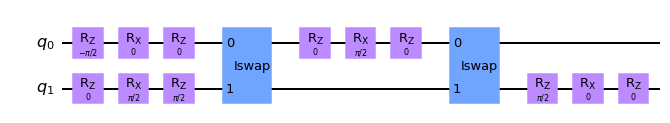

In [22]:
#first let's verify this solution
qc = QuantumCircuit(2)
qc.append(zx_unitary(0,0),[0])
qc.append(zx_unitary(0,1),[1])
#qc.append(rootiswap_gate(), [0,1])
qc.append(iSwapGate(), [0,1])
qc.append(zx_unitary(1,0),[0])
#qc.append(rootiswap_gate(),[0,1])
qc.append(iSwapGate(), [0,1])
qc.append(zx_unitary(1,2),[1])

#iterating parameters does in alphabetical order
#maybe smarter to loop over gates and assign parameters
#this is fine because just creating a loop skeleton for the brute force search
p = [-np.pi/2, 0, 0, np.pi/2, 0, np.pi/2, np.pi/2, 0, 0, np.pi/2, 0, 0]
for i, parameter in enumerate(qc.parameters):
    qc.assign_parameters({parameter:p[i]}, inplace=True)

qc.decompose('ZXZ').draw(output='mpl')

Looks good

In [23]:
Operator(qc).equiv(Operator(CXGate()))

True

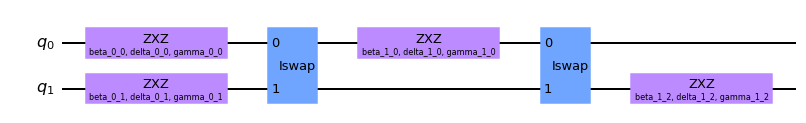

In [28]:
#Next, build a version to sweep parameers on
#After we show this works, see if for a similar building block we can make other C(U) gates
qc = QuantumCircuit(2)
qc.append(zx_unitary(0,0),[0])
qc.append(zx_unitary(0,1),[1])
#qc.append(rootiswap_gate(), [0,1])
qc.append(iSwapGate(), [0,1])
qc.append(zx_unitary(1,0),[0])
#qc.append(rootiswap_gate(), [0,1])
qc.append(iSwapGate(), [0,1])
qc.append(zx_unitary(1,2),[1])
qc.draw(output='mpl')

In [29]:
# #Note on tuple unpacking syntax
# a = [el for el in product(product(beta_range, delta_range, gamma_range), repeat=3)]
# # ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0))
# # ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 1.5707963267948966))
# # ((0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 3.141592653589793))
# # ...

# # [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [33]:
from itertools import product
alpha_range = beta_range = delta_range = gamma_range = [0, np.pi/2, -np.pi/2] #np.arange(0, 2 * np.pi, np.pi/2)

#need some clever comphrension to bind all the parameters
circuits = []
c = 0

for parameter_set in product(product(beta_range, delta_range, gamma_range), repeat=4):
    unpack_set = [el for sub in parameter_set for el in sub]
    parameter_dict = {parameter:value for parameter,value in zip(qc.parameters, unpack_set)}
    circuits.append(qc.bind_parameters(parameter_dict))

In [31]:
target = CRZGate(np.pi/2)
found = None
for circuit in circuits:
    if Operator(circuit).equiv(Operator(target)):
        # print(circuit.decompose('ZXZ').draw())
        found = circuit
        break
found.decompose('ZXZ').draw(output='mpl')

AttributeError: 'NoneType' object has no attribute 'decompose'

TODO, adapt it so it can search by keep adding segments as needed,
adapt so has gates above on q0,
change from RY to RZ -> need to rederive equations?